# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования**:
1. Изучить, какие факторы больше всего влияют на стоимость квартиры (площадь, число комнат, удаленность от центра, этаж, дата размещения).
2. Выделить населенные пункты с самой высокой и низкой стоимостью жилья.
3. Определить, какая зона считается центральной.
4. Определить, отличается ли в центральной зоне влияние указанных факторов на стоимость жилья?

In [1]:
# Импортируем модули, которые понадобятся по ходу работы
import pandas as pd # Основные интсрументы анализа данных
pd.set_option('display.float_format', '{:,.2f}'.format) # Установка количества выводимых знаков после запятой
import seaborn as sns # Работа с диаграммами
import matplotlib.pyplot as plt # Работа с диаграммами
import warnings
warnings.filterwarnings('ignore') # Отключение предупреждений

## Изучение данных из файла

Для работы с таблицей нам необходимо импортировать библиотеку Pandas и воспользоваться встроенной в нее функцией чтения файла в переменную.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # В переменную data сохраняем прочитанный файл данных
data.head(30) # Выведем на экран первые 30 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


Выведем на экран и изучим общую информацию о таблице:

In [3]:
data.info() # Выводим общую информацию о таблице на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Таблица имеет 22 столбца данных различных типов.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Столбец `cityCenters_nearest` нарушает общий стиль. Заменим его на `city_centers_nearest`.

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Встречаются неявные дубликаты в столбце `locality_name`. Столбец `first_day_exposition` требует дополнительной обработки для перевода данных в правильный формат даты и времени.

### Вывод
В каждой строке таблицы — данные о конкретной квартире, столбцы же описывают ее параметры. <br>
В данных есть пропуски, большинство из которых, на первый взгляд, выглядит оправданными - пользователь мог не указать эти данные. <br>
Также есть столбцы, где нецелесообразно использован тип `float` вместо `int` (столбцы `floors_total` и `balcony`, например), или `object` вместо `bool` (столбец `is_apartment`). <br>
Столбец `first_day_exposition` требует дополнительной обработки данных.
Прежде чем двигаться дальше, устраним подобные проблемы.

## Предобработка данных
В этом разделе будет проведена работа с пропусками, дубликатами и типами данных. Нетипичные и выбивающиеся значения будут обработы в следующих разделах работы.

### Обработка столбца `first_day_exposition`
Данные в столбце `first_day_exposition` представлены в слитном формате. Переведем их в формат `datetime`, используя метод `.to_datetime()`:

In [5]:
# Заменяем тип данных в столбце на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = ('%Y.%m.%dT%H:%M:%S'))
data[['first_day_exposition']].head() # Выводим первые 5 строк для проверки

,first_day_exposition
0,2019-03-07
1,2018-12-04
2,2015-08-20
3,2015-07-24
4,2018-06-19


### Обработка пропусков
Проанализируем столбцы и заполним пропуски там, где это возможно:
* `ceiling_height` - скорее всего, пропуски появились из-за того, что пользователь не указал высоту потолка при создании объявления. Пропуски заполним медианными значениями для каждого населенного пункта.
* `living_area`, `kitchen_area` - аналогичная ситуация, группировать будем по количеству комнат.
* `floors_total` - пропущено мало значений, заполнять их какими-либо данными нецелесообразно. Такие строки удалим. 
* `is_apartment` - пропуски, скорее всего, подразумевают значение `False`, которое пользователь не указал при создании объявления. Можно заменить вручную.
* `balcony` - пропуски, скорее всего, подразумевают отсутствие балкона, которое пользователь не указал при создании объявления. Можно заменить вручную.
* `locality_name` - отсутствует относительно немного значений. К сожалению, без контекста нет возможности восстановить данные о местоположении. Например, можно было бы попробовать восстановть данные по смежным столбцам, говорящим о местоположении - `airports_nearest`, `city_centers_nearest`, `ponds_around3000` и `parks_around3000`, однако, я считаю, это не гарантирует точности и соотношение затрат труда к полученному результату того не стоит. Удаление этих строк не будет иметь большого влияния на результаты ислледования, так и поступим.
* `city_centers_nearest`, `ponds_around3000`, `parks_around3000`, `airports_nearest`, `parks_nearest`, `ponds_nearest` - эти данные получены в автоматическом режиме. Их отсутствие может говорить о проблемах с алгоритмом, предоставляющим эти данные, и этот момент нужно обсудить с разработчиками. Сейчас заполним пропуски медианными данными для каждого населенного пункта.
* `days_exposition` - данные так же получены автоматически и пропуски, скорее всего, говорят о том, что объявление до сих пор актуально. Соответственно, заполнять их нет смысла.

#### Столбцы `is_apartment` и `balcony`

In [6]:
# Обработка столбца is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

# Обработка столбца is_apartment
data['balcony'] = data['balcony'].fillna(0)

# Проверка результатов
print('Количество пропусков в столбце is_apartment:', data['is_apartment'].isna().sum())
print('Количество пропусков в столбце balcony:', data['balcony'].isna().sum())

Количество пропусков в столбце is_apartment: 0
Количество пропусков в столбце balcony: 0


#### Столбцы `locality_name` и `floors_total`
Далее удалим все строки, где не указн город или количество этажей:

In [7]:
data = data.drop(data[data['locality_name'].isna() == True].index)
data = data.drop(data[data['floors_total'].isna() == True].index)

#### Столбцы `living_area` и `kitchen_area`
Далее проверим столбцец `rooms`, поскольку по нему будет проводиться группировка:

In [8]:
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Устраним сейчас только нулевые значения, заменив их единицей.<br>
Указано, что в объявлениях есть квартиры-студии - возможно, нулевое количество комнат как раз подразумевает их. С другой стороны, студия, строго говоря, это все еще одна комната. В реальном случае, конечно, этот момент стоит сразу уточнить у того, кто занимался сбором этих данных - какую логику деления они сюда закладывали. Маловероятно, что площадка позволила бы создать оюъявление о продаже квартиры без указания количества комнат.

In [9]:
data['rooms'] = data['rooms'].replace(0,1)

Далее заменяем пропуски медианными значениями для групп по количеству комнат, используя собственную функцию на основе метода `.transform()`:

In [10]:
# Передаем функции столбец, который необходимо обработать, и критерий группировки
def filler_func(columns, label):
    for column in columns:
        data[column] = data[column].fillna(data.groupby(label)[column].transform('median'))

In [11]:
# Меняем столбецы living_area и kitchen_area
columns = ['living_area', 'kitchen_area']
filler_func(columns, 'rooms')

# Проверям результат
print('Количество пропусков в living_area:', data['living_area'].isna().sum())
print('Количество пропусков в kitchen_area:', data['kitchen_area'].isna().sum())

Количество пропусков в living_area: 0
Количество пропусков в kitchen_area: 0


#### Столбец `ceiling_height`

Пропущенные значения будем заполнять медианными для групп населенных пунктов. Идея выбора имеено этого критерия в том, что в населенных пунктах строятся типовые здания со схожей высотой квартир. <br>
Для корректной группировки по населенным пунктам сначала необходимо избавиться от неявных дубликатов в столбце `locality_name`:

In [12]:
# Изучим уникальные значения столбца
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
# Оставим только названия населенного пункта
names = ['посёлок ',
         'поселок ',
         'городской ',
         'деревня ',
         'городского типа ',
         'село ',
         'коттеджный ',
         'садовое товарищество ',
         'садоводческое некоммерческое товарищество ',
         'при железнодорожной ',
         'станции ']
for name in names:
         data['locality_name'] = data['locality_name'].str.replace(name, '')
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [14]:
# Заполним пропуски
filler_func(['ceiling_height'], 'locality_name')

# Проверям результат
print('Количество пропусков в living_area:', data['ceiling_height'].isna().sum())

Количество пропусков в living_area: 95


Оставшиеся пропуски получились для тех строк, где не удалось посчитать медианное значение по населенному пункту - для таких строк пропуски заполним медианным значением по всем объявлениям.

In [15]:
# Заполним пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# Проверям результат
print('Количество пропусков в living_area:', data['ceiling_height'].isna().sum())

Количество пропусков в living_area: 0


#### Столбцы автоматически полученных данных
Столбцы `city_centers_nearest`, `ponds_around3000`, `parks_around3000`, `airports_nearest`, `parks_nearest`, `ponds_nearest` обработаем аналогичным образом - сгруппируем строки по населенному пункту и заполним пропуски медианными значениями соответствующих групп:

In [16]:
# Заполним пропуски медианными значениями групп
columns = ['city_centers_nearest', 'ponds_around3000', 'parks_around3000', 'airports_nearest']
filler_func(columns, 'locality_name')

# Заполним столбцы parks_nearest и ponds_nearest медианными значениями групп для тех строк, где есть эти объекты
for name in data['locality_name'].unique():
    median = data.loc[(data['locality_name'] == name) & (data['parks_nearest'].isna()==False), 'parks_nearest'].median()
    data.loc[(data['locality_name'] == name) & (data['parks_around3000'] != 0), 'parks_nearest'] = median

for name in data['locality_name'].unique():
    median = data.loc[(data['locality_name'] == name) & (data['ponds_nearest'].isna()==False), 'ponds_nearest'].median()
    data.loc[(data['locality_name'] == name) & (data['ponds_around3000'] != 0), 'ponds_nearest'] = median

# Проверям результат
for column in columns:
    print('Количество пропусков в {}: {}'.format(column, data[column].isna().sum()))
print('Количество пропусков в parks_nearest:', data['parks_nearest'].isna().sum())
print('Количество пропусков в parks_nearest:', data['ponds_nearest'].isna().sum())

Количество пропусков в city_centers_nearest: 5432
Количество пропусков в ponds_around3000: 5432
Количество пропусков в parks_around3000: 5432
Количество пропусков в airports_nearest: 5432
Количество пропусков в parks_nearest: 15534
Количество пропусков в parks_nearest: 14466


Строки, заполнить которые медианными значениями групп не удалось, заполним медианными по всей таблице значениями:

In [17]:
# Заполним пропуски общим медианным значением
columns = ['city_centers_nearest', 'ponds_around3000', 'parks_around3000', 'airports_nearest']
for column in columns:
    data[column] = data[column].fillna(data[column].median())
# Заполним столбцы parks_nearest и ponds_nearest общим медианным значением для тех строк, где есть эти объекты
med_parks = data['parks_nearest'].median()
med_ponds = data['ponds_nearest'].median()

data.loc[(data['parks_around3000'] != 0), 'parks_nearest'] = med_parks
data.loc[(data['ponds_around3000'] != 0), 'ponds_nearest'] = med_ponds

# Проверям результат
for column in columns:
    print('Количество пропусков в {}: {}'.format(column, data[column].isna().sum()))
print('Количество пропусков в parks_nearest:', data['parks_nearest'].isna().sum())
print('Количество пропусков в parks_nearest:', data['ponds_nearest'].isna().sum())    

Количество пропусков в city_centers_nearest: 0
Количество пропусков в ponds_around3000: 0
Количество пропусков в parks_around3000: 0
Количество пропусков в airports_nearest: 0
Количество пропусков в parks_nearest: 15534
Количество пропусков в parks_nearest: 9034


In [18]:
# Взгялнем на результат в таблице
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,460.00,2.00,504.00,nan
1,7,"3,350,000.00",40.40,2018-12-04,1,2.62,11.00,18.60,1,False,...,11.00,2.00,Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,460.00,2.00,504.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14.00,45.00,9,False,...,9.50,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,460.00,3.00,504.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,460.00,1.00,504.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12.00,14.40,5,False,...,9.10,0.00,Янино-1,"26,763.00","13,073.00",0.00,nan,1.00,504.00,55.00
6,6,"3,700,000.00",37.30,2017-11-02,1,2.64,26.00,10.60,6,False,...,14.40,1.00,Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18,2,2.70,24.00,30.50,22,False,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23,1,2.70,27.00,15.43,26,False,...,8.81,0.00,Мурино,"26,763.00","13,073.00",0.00,nan,1.00,504.00,189.00
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


#### Вывод
В результате обработки пропусков данных в таблице были выполнены следующие действия:
* Столбец `first_day_exposition` был приведен к формату дат;
* Столбцы `is_apartment` и `balcony` были заполнены значениями `False` и `0` соответственно;
* В столбцах `locality_name` и `floors_total` строки с пропущенными данными были удалены;
* Столбцы `living_area` и `kitchen_area` были заполнены медианными значениями на основе группировки по количеству комнат;
* Столбец `ceiling_height` был заполнен медианными данными на основе группировки по населенному пункту;
* Столбцы автоматически полученных данных были заполнены медианными значениями на основе группировки по населенному пункту там, где это было возможно. Остальные значения были заполнены медианными значениями всей таблицы. Для объявлений, где в радиусе 3 км нет водоемов или парков - расстояния до соответствующих объектов оставлены пустыми.
* Столбец `days_exposition` был оставлен без изменения, поскольку пропуски в данных, скорее всего, говорят о том, что объявление до сих пор актуально.

Возможные причины появления пропусков и меры по их устранению были предложены в соответсвующих подразделах.

### Удаление дубликатов

In [19]:
data = data.drop_duplicates() # Удаляем все дубликаты строк
print('Количество дубликатов:', data.duplicated().sum()) # Проверим результат

Количество дубликатов: 0


### Изменение типов данных
Подробно проанализируем столбцы и присвоим им наиболее подходящие типы данных. <br>
Для удобства и наглядности повторно выведем строку таблицы:

In [20]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,460.00,2.00,504.00,nan


Выделим проблемные столбцы и укажем необходимый тип с обоснованием выбора:
* `last_price` - необходим тип `int`, т.к. все цены - целочисленные;
* `floors_total` - необходим тип `int`, т.к. количество этажей - целочисленное значение;
* `is_apartment` - необходим тип `bool`, согласно документации;
* `balcony` - необходим тип `int`, т.к. количество балконов - целочисленное значение;
* `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` - необходим тип `int`, т.к. данные о расстоянии представлены целыми значениями;
* `parks_around3000`, `ponds_around3000` - необходим тип `int`, т.к. данные подразумевают целое количество объектов в радиусе;
* `days_exposition` - необходим тип `int`, т.к. данные о количестве дней представлены целочисленными значениями.

Напишем функцию, которая методом .astype() будет в указанных столбцах менять тип на выбранный пользователем:

In [21]:
# Функции передается список столбцов и необходимый тип данных
def column_type_changer(columns, data_type):
    for column in columns:
        data[column] = data[column].astype(data_type, errors = 'ignore')

Воспользуемся этой функцией, чтобы присвоить указанным выше столбцам соответствующие типы данных:

In [22]:
# Для столбцов типа int
columns = ['last_price',
           'floors_total',
           'balcony',
           'airports_nearest',
           'city_centers_nearest',
           'parks_nearest',
           'ponds_nearest',
           'parks_around3000',
           'ponds_around3000',
           'days_exposition']
column_type_changer(columns, 'int')

data.info() # Проверяем результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null int64
city_centers_nearest    23565 non-null int64
parks_around3000        23565 non-null int64
parks_nearest           8031 non-null float64
ponds_around3000    

#### Вывод
Типы данных были изменены в соответствии с указанным в начале раздела.<br>
Столбцы `parks_nearest`, `ponds_nearest` и `days_exposition` сохранили тип `float` потому, что в них остались пропуски данных.

## Расчёты и добавление результатов в таблицу
### Цена квадратного метра
Добавим в таблицу столбец `sq_m_price` с информацией о цене за квадратный метр для каждого объявления:

In [23]:
# Добавляем столбец целочисленного типа
data['sq_m_price'] = (data['last_price'] / data['total_area']).astype('int')
data[['last_price', 'total_area', 'sq_m_price']].head()

,last_price,total_area,sq_m_price
0,13000000,108.00,120370
1,3350000,40.40,82920
2,5196000,56.00,92785
3,64900000,159.00,408176
4,10000000,100.00,100000


### День недели, месяц и год публикации объявления
Создадим столбцы `ad_weekday`, `ad_month` и `ad_year`, в которые поместим данные о дне недели, месяце и годе размещения объявления соответственно. Для этого воспользуемся классом `DatetimeIndex` с соответствующими атрибутами:

In [24]:
# Столбец с днем недели
data['ad_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).day_name()
# Столбец с месяцем
data['ad_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
# Столбец с годом
data['ad_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

# Проверка
data[['first_day_exposition', 'ad_weekday', 'ad_month', 'ad_year']].head()

,first_day_exposition,ad_weekday,ad_month,ad_year
0,2019-03-07,Thursday,3,2019
1,2018-12-04,Tuesday,12,2018
2,2015-08-20,Thursday,8,2015
3,2015-07-24,Friday,7,2015
4,2018-06-19,Tuesday,6,2018


### Этаж квартиры
Создадим столбец `floor_category`, в котором отметим категорию этажа квартиры: первый, последний, другой. Для этого создадим функцию `set_floor_category`:

In [25]:
# Создаем функицю присваивания категории этажа
def set_floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# Создаем столбец floor_category и записываем в него результат работы функции
data['floor_category'] = data.apply(set_floor_category, axis = 1)

# Проверка работы функции
data[['floor', 'floors_total', 'floor_category']].head()

,floor,floors_total,floor_category
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой


### Соотношение жилой и общей площади
Создадим столбец `living_to_total_ratio` и поместим в него данные об отношении жилой к общей площиди квартиры:

In [26]:
data['living_to_total_ratio'] = data['living_area'] / data['total_area']
data[['living_area', 'total_area', 'living_to_total_ratio']].head()

,living_area,total_area,living_to_total_ratio
0,51.00,108.00,0.47
1,18.60,40.40,0.46
2,34.30,56.00,0.61
3,45.00,159.00,0.28
4,32.00,100.00,0.32


### Соотношение площади кухни к общей общади
Подобным образом создадим столбец `kitchen_to_total_ratio` и поместим в него данные об отношении площади кухни к общей площиди квартиры:

In [27]:
data['kitchen_to_total_ratio'] = data['kitchen_area'] / data['total_area']
data[['kitchen_area', 'total_area', 'kitchen_to_total_ratio']].head()

,kitchen_area,total_area,kitchen_to_total_ratio
0,25.00,108.00,0.23
1,11.00,40.40,0.27
2,8.30,56.00,0.15
3,9.50,159.00,0.06
4,41.00,100.00,0.41


### Вывод
В данном разделе в таблицу были добавлены столбцы с данными о цене квадратного метра, подробном времени размещения объявления, категории этажа квартиры, и соотношениях различных площадей к общей площади квартиры. 

## Исследовательский анализ данных
### Изучение параметров площади, цены, числа комнат, высоты потолков
В этом пункте изучим указанные данные при помощи графического представления. Начнем с данных о площади квартир:<br>
#### Площадь квартир
##### Общая площадь
Методом `.describe()` получим информацию о столбце:

In [28]:
data['total_area'].describe() # Общая площадь

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

Данные в столбце находятся в диапазоне 12 - 900 квадратных метров, большинство приходится на диапазон 40 - 69.7 квадратных метров.

Построим гистаграмму распределения на 30 корзин, ограничив значения диапазоном от 10 до 200 квадратных метров, чтобы обрезать редкие выбивающиеся данные.

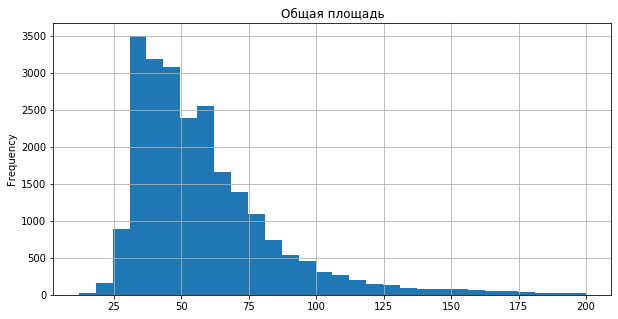

In [29]:
data['total_area'].plot(kind = 'hist', bins = 30, range = (12, 200), grid = True, title = 'Общая площадь', figsize = (10, 5))

Распределение диаграммы похоже на распределение Пуассона. <br>
Как видно из диаграммы, большинство предложений приходится на квартиры площадью до 50 квадратных метров (сюда попадают, в основном, одно- и двухкомнатные квартиры), и по мере увеличения площади уменьшается количество предложений. Наличие данных, попадающих в хвост диаграммы (200+ квадратных метров), может быть обусловлено объявлениями о продаже больших квартир или частных домов, либо ошибками при заполнении объявления.

##### Жилая площадь
Далее взглянем отдельно на данные о жилой площади и площади кухни:<br>

In [30]:
data['living_area'].describe() # Жилая площадь

count   23,565.00
mean        34.32
std         21.72
min          2.00
25%         18.40
50%         30.30
75%         42.70
max        409.70
Name: living_area, dtype: float64

Диапазон данных 2 - 409.7 квадратных метра, большинство значений лежит в пределах 18 - 42.7 квадратных метра.

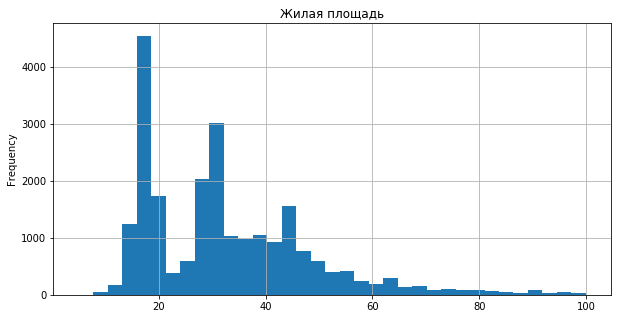

In [31]:
data['living_area'].plot(kind = 'hist', bins = 35, range = (5, 100), grid = True, title = 'Жилая площадь', figsize = (10, 5))

На диаграмме распределения жилой площади видно три всплеска, которые, скорее всего, обусловлены типичным для одно-, двух - и трехкомнатных квартир метражом жилой площади: первый пик приходится на значения 16-20 квадратных метров, второй - на 28-32 квадратных метра, третий - на 44-48 квадратных метра. Построим диаграмму рассеяния, чтобы проверить данную гипотезу:

Корреляция между жилой площадью и количеством комнат: 0.8571061793225488


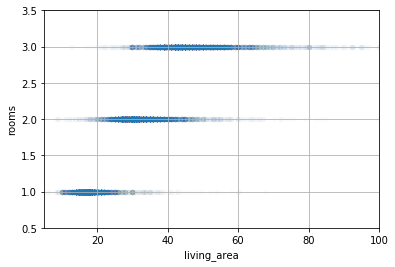

In [32]:
data.plot(x = 'living_area', y = 'rooms', kind = 'scatter', ylim = (0.5,3.5), xlim = (5, 100), grid = True, alpha=0.01)
print('Корреляция между жилой площадью и количеством комнат:',data['living_area'].corr(data['rooms']))

Как видно из коэффициента Пирсона и диаграммы, между двумя этими значениями есть довольно сильная связь.

##### Площадь кухни

In [33]:
data['kitchen_area'].describe() # Площадь кухни

count   23,565.00
mean        10.44
std          5.64
min          1.30
25%          7.30
50%          9.00
75%         11.50
max        112.00
Name: kitchen_area, dtype: float64

Диапазон значений столбца 1.3 - 112 квадратных метров, большинство знаней в диапазоне 7.3 - 11.5 квадратных метров.

Корреляция между площадью кухни и количеством комнат: 0.27545366618923783


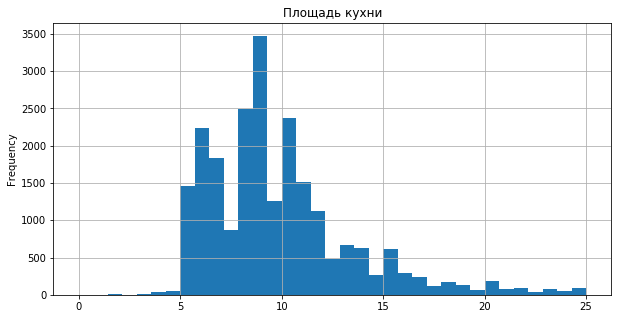

In [34]:
data['kitchen_area'].plot(kind = 'hist', bins = 35, range = (0, 25), grid = True, title = 'Площадь кухни', figsize = (10, 5))
print('Корреляция между площадью кухни и количеством комнат:',data['kitchen_area'].corr(data['rooms']))

Большинство значений лежат в диапазоне 5-15 квадратных метров. Судя по коэффицинту Пирсона, связзь между площадью кухни и количеством комнат довольно слабая - здесь, скорее всего, главную роль играет планировка квартиры, которая никак не учитывается в данном исследовании.

#### Цена за квадратный метр
Аналогичным образом исследуем цену за квадратный метр. Построим гистограмму распределения:

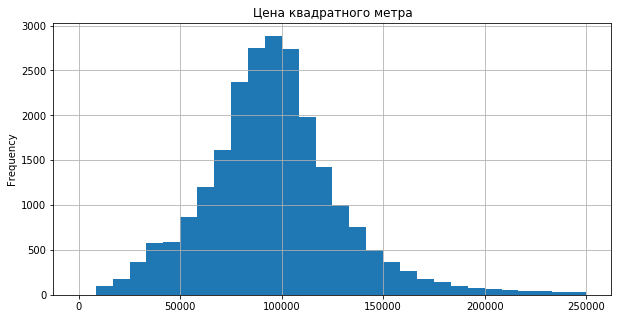

In [35]:
data['sq_m_price'].plot(kind = 'hist', bins = 30, grid = True, range = (0, 250000), title = 'Цена квадратного метра', figsize = (10, 5))

Как видно из диаграммы, самая частая цена за квадратный метр находится в районе 100 тысяч рублей.

#### Число комнат
Далее исследуем распределение одно-, двух- и трехкомнатных квартир на рынке:

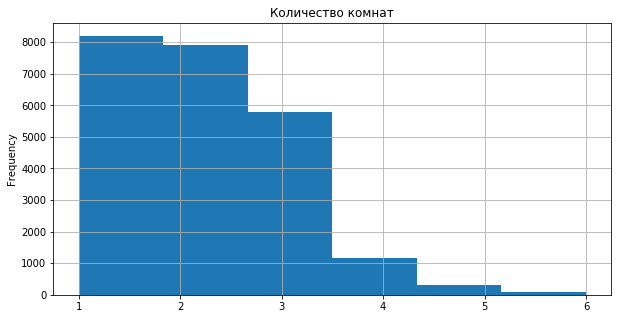

In [36]:
data['rooms'].plot(kind = 'hist', bins = 6, grid = True, range = (1, 6), title = 'Количество комнат', figsize = (10, 5))

Как и ожидалось, большинство квартир на рынке являются одно-, двух- и трехкомнатными.

#### Высота потолков

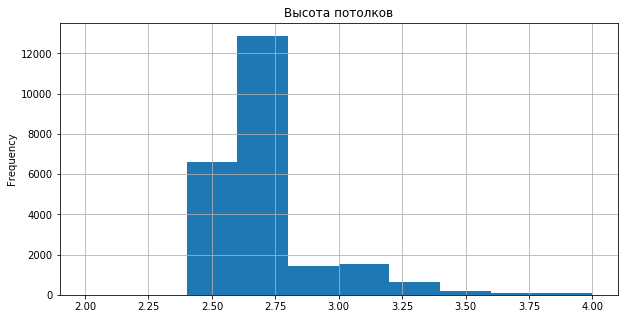

In [37]:
data['ceiling_height'].plot(kind = 'hist', bins = 10, grid = True, range = (2, 4), title = 'Высота потолков', figsize = (10, 5))

Чаще всего встречаются квартиры с высотой потолков в диапазоне 2.4-2.8 метра.

### Удаление редких и выбивающихся значений
В данном пункте анализировать и чистить от выбивающихся значений мы будем те столбцы, которые будем анализировать далее в работе, а именно: `total_area`, `sq_m_price`, `rooms`, `ceiling_height` и `days_exposition`.<br>
Сначала создадим функцию, которая будет описывать столбец, рассчитывать межквантильных размах и удалять выбивающиеся значения:

In [38]:
# Функция описания столбца
def rare_values(dataframe, column):
    print(f'Описание столбца {column}:')
    print(dataframe[column].describe())
    
    # Расчет IQR (межквартильного размаха)
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    
    # Расчет нижней и верхней границ
    bottom_border = q1 - iqr * 1.5
    if bottom_border < 0: # Если нижняя граница получилась меньше 0, присваиваем ей значение 0
        bottom_border = 0
    top_border = q3 + iqr * 1.5
    
    # Подсчет выбивающихся значений    
    bottom_rare_values = dataframe.query(f'{column} < @bottom_border')[column].count()
    top_rare_values = dataframe.query(f'{column} > @top_border')[column].count()

    # Вывод рассчитанных значений на экран
    print(f'Первый квартиль = {q1}, Третий квартиль = {q3}\n'
    f'Нижняя граница = {bottom_border}, Верхняя граница = {top_border}\n'
    f'Количество редких значений меньше нижней границы среди оставшихся строк = {bottom_rare_values}\n'
    f'Количество редких значений больше верхней границы среди оставшихся строк = {top_rare_values}\n')
    
    # Удаление выбивающихся значений
    dataframe = dataframe.drop(
        dataframe[(dataframe[column] < bottom_border) | (dataframe[column] > top_border)].index, inplace = True)
    return dataframe

#### Столбец `total_area`
Начем со столбца `total_area`. Построим диаграмму размаха, затем выведем описание столбца, используя созданную выше функцию:

(0, 200)

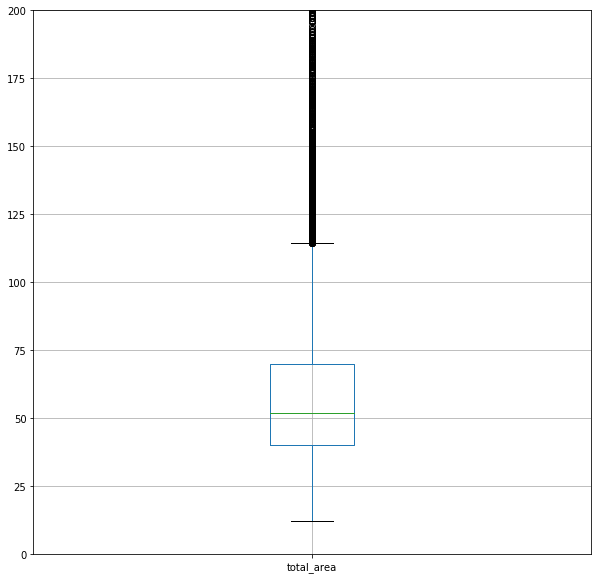

In [39]:
data['total_area'].plot.box(grid = True, figsize = (10,10))
plt.ylim(0, 200)

Межквартильный размах, судя по диаграмме, лежит в диапазоне от 12.5 до 115 квадратных метров. Это ориентировочная граница нормального размаха, значения выше уже считаются выбросами. Рассчитаем размах:

In [40]:
rare_values(data, 'total_area')

Описание столбца total_area:
count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64
Первый квартиль = 40.0, Третий квартиль = 69.7
Нижняя граница = 0, Верхняя граница = 114.25
Количество редких значений меньше нижней границы среди оставшихся строк = 0
Количество редких значений больше верхней границы среди оставшихся строк = 1239



#### Столбец `sq_m_price`
Далее аналогичным образом исследуем столбец `sq_m_price`:

(0, 250000)

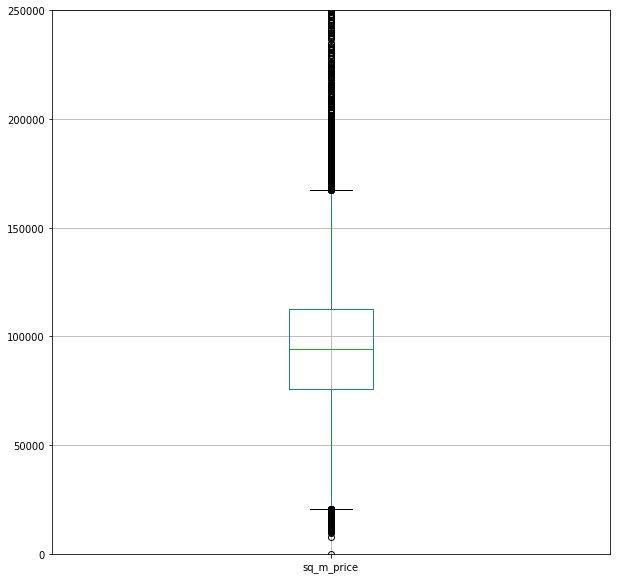

In [41]:
data['sq_m_price'].plot.box(grid = True, figsize = (10,10))
plt.ylim(0, 250000)

Межквартильный размах, судя по диаграмме, лежит в диапазоне от 20 до 170 тысяч рублей. Это ориентировочная граница нормального размаха, значения выше уже считаются выбросами. Рассчитаем размах:

In [42]:
rare_values(data, 'sq_m_price')

Описание столбца sq_m_price:
count    22,326.00
mean     96,002.08
std      38,001.48
min         111.00
25%      75,757.00
50%      94,138.50
75%     112,400.00
max     848,484.00
Name: sq_m_price, dtype: float64
Первый квартиль = 75757.0, Третий квартиль = 112400.0
Нижняя граница = 20792.5, Верхняя граница = 167364.5
Количество редких значений меньше нижней границы среди оставшихся строк = 185
Количество редких значений больше верхней границы среди оставшихся строк = 651



#### Столбец `days_exposition`

(0, 600)

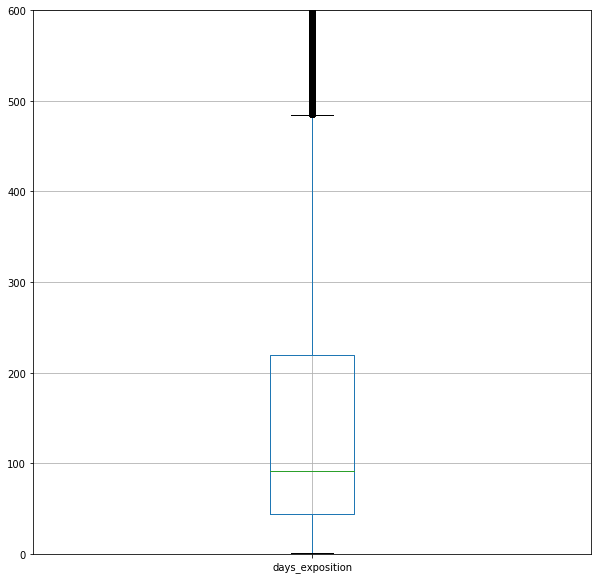

In [43]:
data['days_exposition'].plot.box(grid = True, figsize = (10,10))
plt.ylim(0, 600)

Межквартильный размах, судя по диаграмме, лежит в диапазоне от 0 до 170 тысяч рублей. Это ориентировочная граница нормального размаха, значения выше уже считаются выбросами. Рассчитаем размах:

In [44]:
rare_values(data, 'days_exposition')

Описание столбца days_exposition:
count   18,833.00
mean       173.88
std        212.14
min          1.00
25%         44.00
50%         92.00
75%        220.00
max      1,580.00
Name: days_exposition, dtype: float64
Первый квартиль = 44.00000000000001, Третий квартиль = 220.0
Нижняя граница = 0, Верхняя граница = 484.0
Количество редких значений меньше нижней границы среди оставшихся строк = 0
Количество редких значений больше верхней границы среди оставшихся строк = 1570



#### Столбец `rooms`

(0, 8)

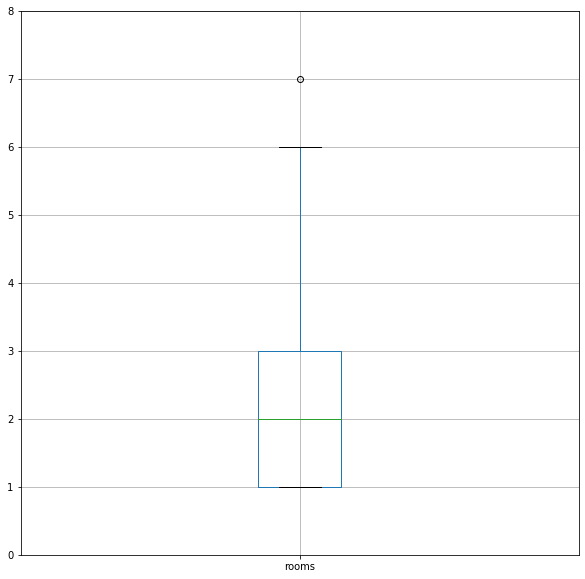

In [45]:
data['rooms'].plot.box(grid = True, figsize = (10,10))
plt.ylim(0, 8)

Межквартильный размах, судя по диаграмме, лежит в диапазоне от 1 до 6 комнат, значения выше уже считаются выбросами. Рассчитаем размах:

In [46]:
rare_values(data, 'rooms')

Описание столбца rooms:
count   19,920.00
mean         1.94
std          0.88
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms, dtype: float64
Первый квартиль = 1.0, Третий квартиль = 3.0
Нижняя граница = 0, Верхняя граница = 6.0
Количество редких значений меньше нижней границы среди оставшихся строк = 0
Количество редких значений больше верхней границы среди оставшихся строк = 1



#### Столбец `ceiling_height`

(1, 4)

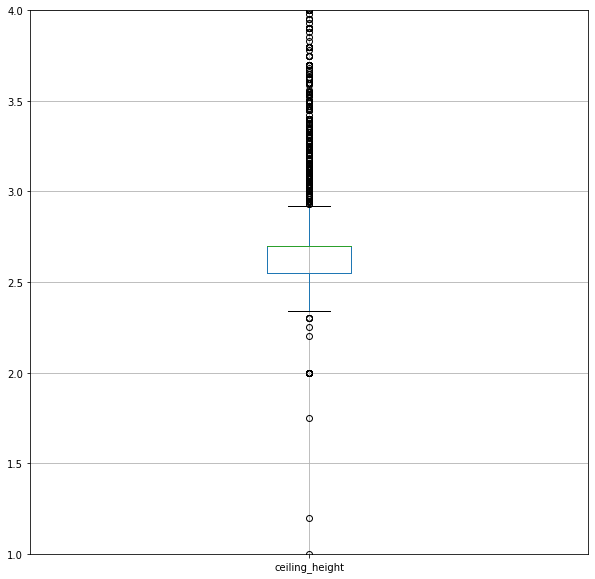

In [47]:
data['ceiling_height'].plot.box(grid = True, figsize = (10,10))
plt.ylim(1, 4)

Межквартильный размах, судя по диаграмме, лежит в диапазоне от 2.3 до 2.9 метров. Это ориентировочная граница нормального размаха, значения выше уже считаются выбросами. Рассчитаем размах:

In [48]:
rare_values(data, 'ceiling_height')

Описание столбца ceiling_height:
count   19,919.00
mean         2.70
std          0.80
min          1.00
25%          2.55
50%          2.70
75%          2.70
max         32.00
Name: ceiling_height, dtype: float64
Первый квартиль = 2.55, Третий квартиль = 2.7
Нижняя граница = 2.3249999999999993, Верхняя граница = 2.9250000000000007
Количество редких значений меньше нижней границы среди оставшихся строк = 20
Количество редких значений больше верхней границы среди оставшихся строк = 1598



#### Вывод
По итогам раздела былы удалены строки с выбивающимися данными в столбцах `total_area`, `sq_m_price`, `rooms`, `ceiling_height` и `days_exposition`. Больше всего выбивающихся значений было найдено в столбацах `total_area`, `ceiling_height` и `days_exposition` - около 1500 значений в них было выше верхней границы.

In [49]:
print(f'Суммарно было удалено {23699 - data["total_images"].count()} строк.')

Суммарно было удалено 5398 строк.


### Изучение времени продажи квартиры
Для изучения построим гистаграмму, рассчитаем среднее и медианное время продажи:

Среднее время продажи 120 дней, медианное - 78 дней.


count   15,989.00
mean       120.84
std        114.47
min          1.00
25%         39.00
50%         78.00
75%        171.00
max        484.00
Name: days_exposition, dtype: float64

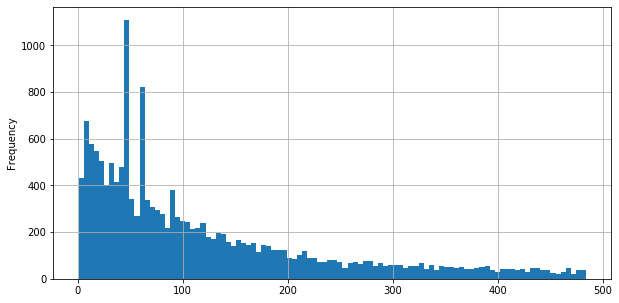

In [50]:
data['days_exposition'].plot(kind = 'hist', bins = 100, grid = True, figsize = (10, 5))
print(f'Среднее время продажи {int(data["days_exposition"].mean())} дней, медианное - {int(data["days_exposition"].median())} дней.')
data['days_exposition'].describe()

На гистограмме выделяются пики в диапазоне значений 0 - 150 дней. Рассмотрим этот сегмент подробнее:

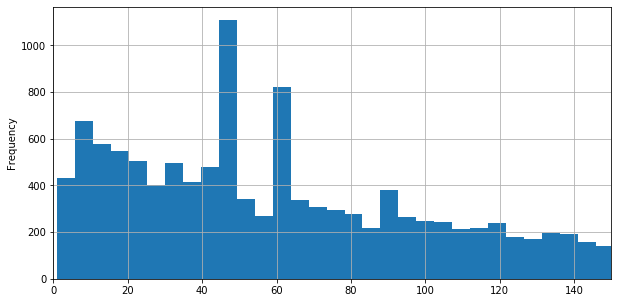

In [51]:
data['days_exposition'].plot(kind = 'hist', bins = 100, xlim=(0, 150), grid = True, figsize = (10, 5))

Пики расположены около 10, 45, 60 и 90 дней.<br>
Вероятно, первый пик - это очень хорошие варианты, которые люди сразу покупают. 10 дней - это срок на "1 раз посмотреть, быстро подготовить документы и деньги, и провести сделку".<br>
Пики далее могут быть связаны с работой риэлтора или еще какой компании. У ПИКа есть что-то вроде "если долго не продается квартира, мы выкупим ее сами". Возможно, тут та же история. Или как-нибудь с ипотекой связано - пока банк все одобрит и оформит. Других разумных причин, честно говоря, придумать не могу. Если бы это было среднее время для неспешной покупки по типу "ищу, увидел - понравилось - посмотрел еще несколько подобных вариантов, подумал  начал что-то оформлять", дальше не было бы резкого провала по количеству продаж.

#### Вывод
Исходя из гистаграммы, большинство квартир было продано быстрее, чем за 200 дней. <br>
Судя про первому и третему квартилям, можно разделить продажи на необычно быстрые (быстрее 39 дней) и необычно долгие (дольше 171 дня). По всем объявлениям средний срок продажи квартиры составляет 120 дней.

### Изучение факторов, влияющих на стоимость квартиры
В разделе будет изучено зависит ли цена за квадратный метр от площади, числа комнат, удалённости от центра. Далее рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.
#### Площадь

Коэффициент корреляции: -0.004570142684138485


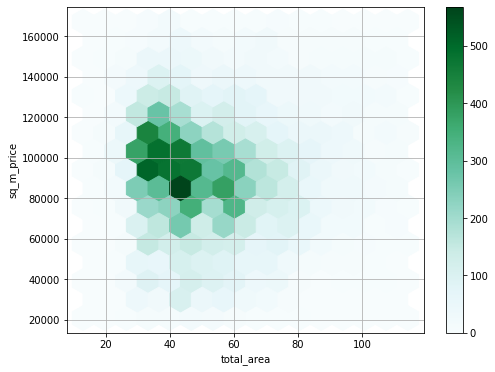

In [52]:
print(f'Коэффициент корреляции: {data["total_area"].corr(data["sq_m_price"])}')
data.plot(kind='hexbin', x='total_area', y='sq_m_price', gridsize=15, figsize=(8, 6), sharex=False, grid=True)

Похоже, что цена за квадратный метр не связана в площадью квартиры - коэффициент корреляции практически равен нулю. Судя по диаграмме - наиболее частым предложением является квартира площадью около 43 квадратных метров с ценой около 85 тысяч рублей за метр.

#### Число комнат

Коэффициент корреляции: -0.19061742822432873


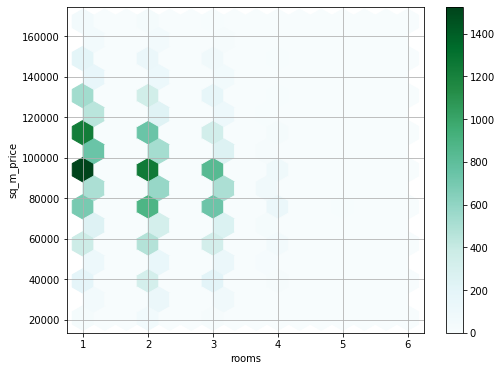

In [53]:
print(f'Коэффициент корреляции: {data["rooms"].corr(data["sq_m_price"])}')
data.plot(kind='hexbin', x='rooms', y='sq_m_price', gridsize=15, figsize=(8, 6), sharex=False, grid=True)

Наблюдается аналогичная предыдущему пункту ситуация - потому что число комнат имеет большую корреляцию с общей площадью квартиры. Судя по коэффициенту, здесь даже наблюдается очень слабая обратная зависимость - с увеличением числа комнат падает цена за квадратный метр площади.<br>
Судя по диаграмме, наиболее частая средняя цена за квадратный метр для одно-, двух- и трехкомнатных квартир находится на уровне 100 тысяч рублей.

#### Удаленность от центра

Коэффициент корреляции: -0.1757511898100958


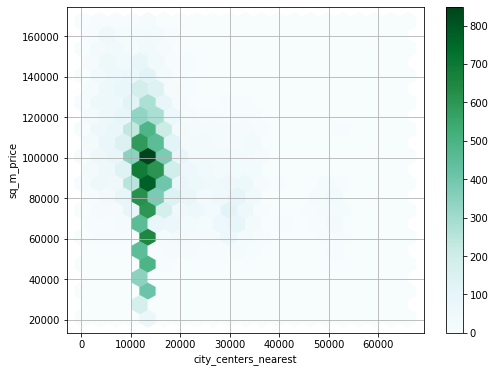

In [54]:
print(f'Коэффициент корреляции: {data["city_centers_nearest"].corr(data["sq_m_price"])}')
data.plot(kind='hexbin', x='city_centers_nearest', y='sq_m_price', gridsize=20, sharex=False, figsize=(8, 6), grid=True)

Отрицательный коэффициент корреляции говорит о том, что с уменьшением расстояния до центра растет стоимость квадратного метра - логически все верно. 
Судя по диаграмме, большинсво размещенных квартир расположено на расстоянии около 13 километров от центра со средней ценой около 100 тысяч рублей за квадратный метр.

#### Этаж
Для качественных значений мы не можем рассчитать коэффициент корреляции, поэтому воспользуемся диаграммой размаха:

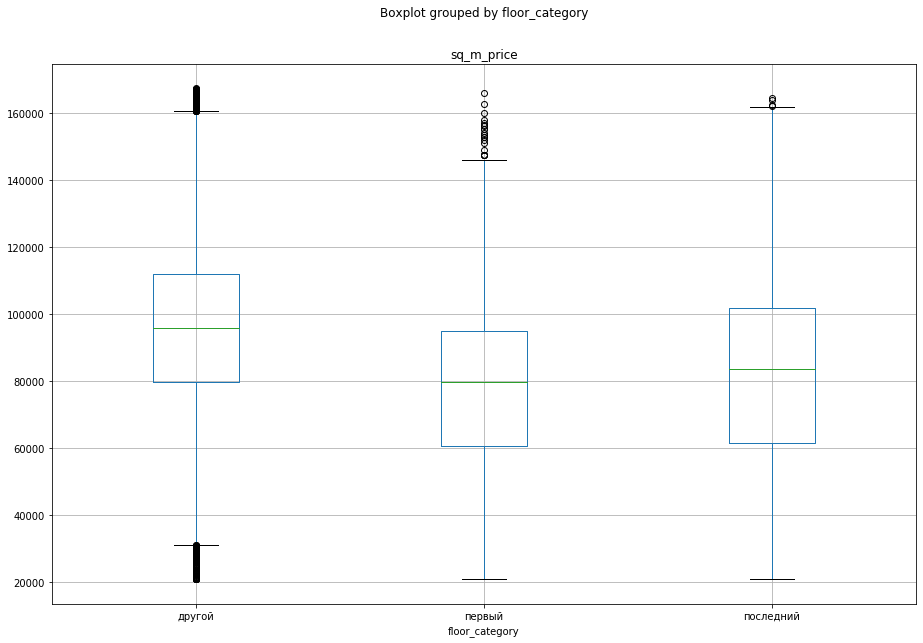

In [55]:
data.boxplot(column = 'sq_m_price', by = 'floor_category', figsize = (15,10))

Судя по диаграмме, выше всего медианная цена на квартиры, находящие на средних этажах  - около 96 тысяч рублей за квадратный метр. Далее идут квартиры на последнем этаже с ценной около 83 тысяч за квадратный метр, и дешевле всех - квартиры на первом этаже с ценой около 80 тысяч рублей за квадратный метр.

#### Дата размещения
Изучим отдельно статитстику по дням недели, месяцам и годам.<br>
Начнем с дней недели. Как и с этажами, построим диаграмму размаха:

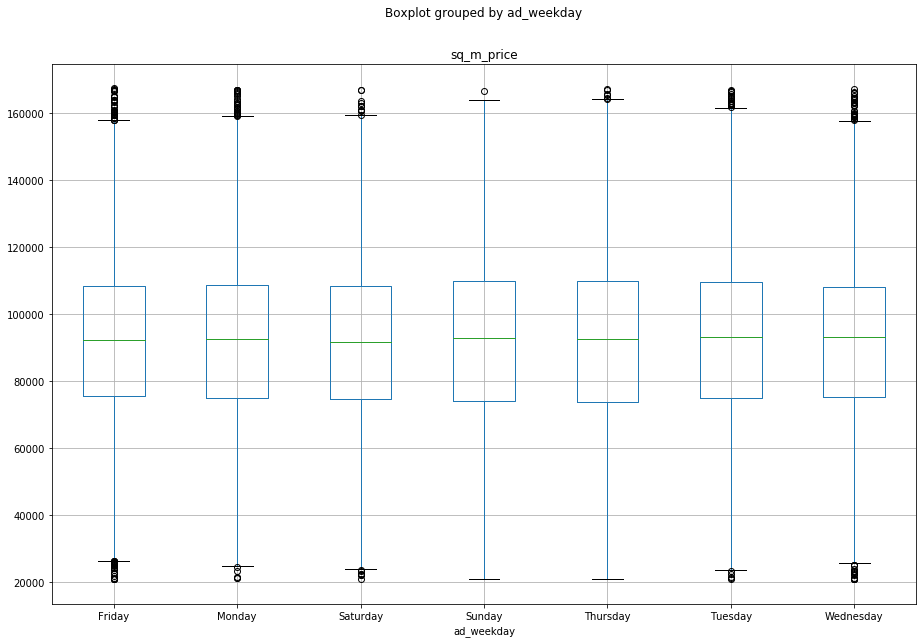

In [56]:
data.boxplot(column = 'sq_m_price', by = 'ad_weekday', figsize = (15,10))

Судя по диаграмме, день размещения объявления не влияет на стоимость квадратного метра - она везде примерно одинакова и находится на уровне 92 тысяч рублей.

Далее построим диаграмму размаха по месяцам:

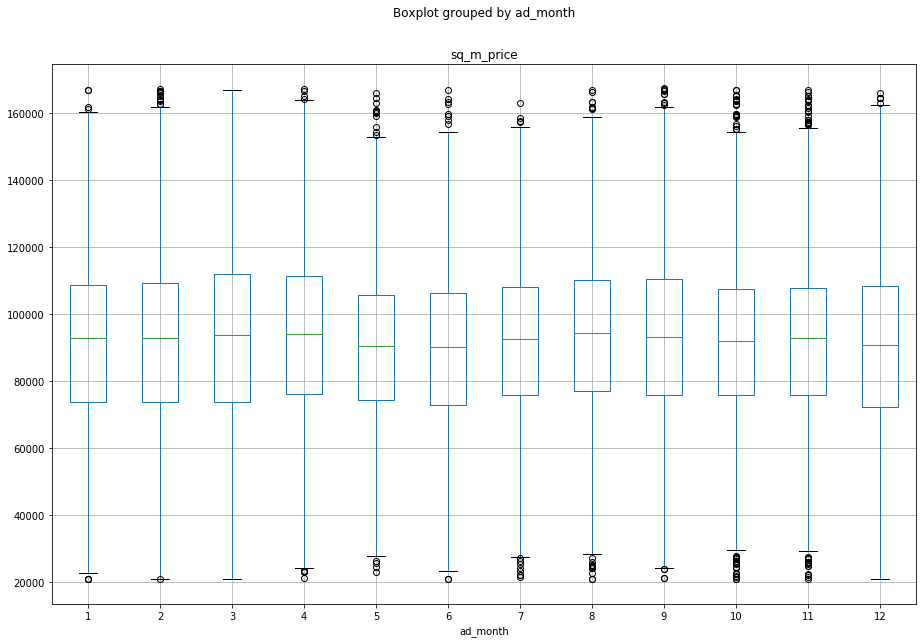

In [57]:
data.boxplot(column = 'sq_m_price', by = 'ad_month', figsize = (15,10))

Похоже, что для квартир, выставленных на продажу весной и осенью цена квадратного метра чуть выше, однако разброс небольшой - примерно от 90 до 95 тысяч рублей.

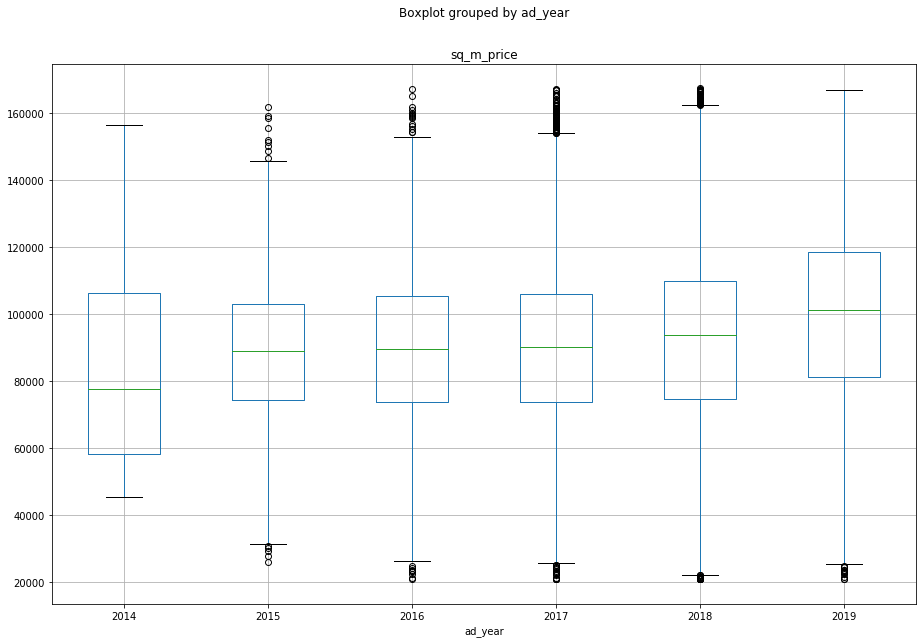

In [58]:
data.boxplot(column = 'sq_m_price', by = 'ad_year', figsize = (15,10))

А вот по этой диаграмме можно отследить четкую тенденцию - с каждым годом медианная цена квадратного метра растет. Если в 2014 она составляла примерно 78 тысяч, то в 2019 - уже 101 тысячу.

#### Вывод
В разделе была выявлена зависимость цены квадратного метра от следующих факторов:
* Удаленность от центра. Чем ближе к центру, тем выше стоимость;
* Этажа квартиры. Квартиры не на крайних этажах стоят дороже. На первом этаже самые дешевые предложения;
* Времени размещения. Во-первых, размещенные весной и осенью квартиры стоят чуть дороже. Во-вторых, с каждым годом цена повышается.
Зависимость цены от года - очевидно существенна. Недвижимость дорожает, и это хорошо видно по диаграмме - за 5 лет медианная цена квадратного метра выросла чуть более, чем на 20%.<br>
Зависимость от месяца очень маленькая. Не думаю, что диапазон цены +-5 тысяч за квадратный метр при покупке квартиры будет для кого-то решающим фактором. Зависимость от дня - тем более несущественна.

### Изучение предложения квартир
В данном разделе выделим центральную зону Санкт-Петербурга. Для этого по столбцу `city_centers_nearest` рассчитаем среднюю стоимость для каждого километра и построим график - резкое изменение на нем и будет говорить о границе центральной зоны.

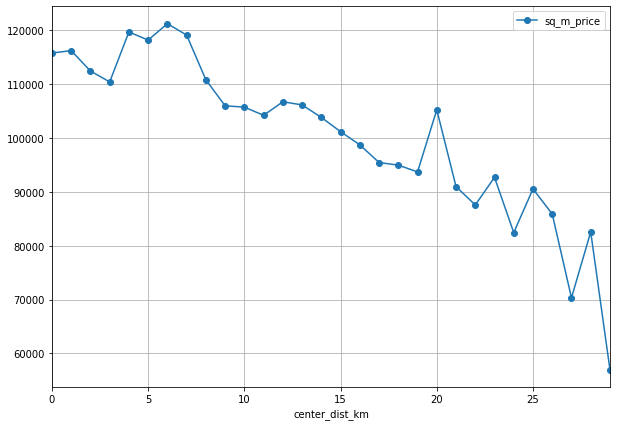

In [59]:
# Создаем столбец с расстоянием до центра в километрах
data['center_dist_km'] = (data['city_centers_nearest'] / 1000).astype('int')
# Выделим объявления в СПБ в отдельную таблицу
data_spb = data.query('locality_name == "Санкт-Петербург"')
# Рассчитываем среднюю стоимость километра
center_dist_price = data_spb.pivot_table(index = 'center_dist_km', values = 'sq_m_price').reset_index()
center_dist_price.plot(x = 'center_dist_km', grid = True, style='o-', figsize = (10,7))

#### Вывод
Судя по графику, можно предположить, что центральная зона находится в пределах 7-8 километров - там цена лежит в диапазоне 110-120 тысяч рублей за квардратный метр. Дальше с увеличением расстояния цена постепенно падает.<br>
Для дальнейшего исследования примем границу зоны равную 8 километрам.

### Выделение населенных пунктов и анализ цен
В данном пункте выдели 10 населенных пунктов с наибольшим количеством объявлений, и посчитаем среднюю цену квадратного метра для каждого из них. Затем выделим населенные пункты с самой высокой и низкой стоимостью жилья.<br>
Для выполнения первого задания воспользуемся сводной таблицей:

In [60]:
data.pivot_table(index = 'locality_name',
                 values = 'sq_m_price',
                 aggfunc = ('count', 'mean')
                ).sort_values(by = 'count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,"11,498.00","104,804.24"
Мурино,543.00,"86,303.72"
Кудрово,429.00,"95,466.99"
Шушары,411.00,"78,509.23"
Всеволожск,351.00,"66,876.99"
Парголово,310.00,"90,012.79"
Колпино,302.00,"75,423.62"
Пушкин,289.00,"100,922.00"
Гатчина,260.00,"69,169.54"


#### Вывод по срезу
В таблице показаны 10 населенных пунктов с самым большим количеством объявлений. Самый популярный населенный пункт - Санкт-Петербург с 11498 объявлениями и средней ценой за квадратный метр 104804 рубля. Наименее популярный - Выборг со 192 объявлениями и средней ценой за квадратный метр 57850 рублей.

Далее выделим населенные пункты с минимальной и максимальной средней ценой за квадратный метр по всей таблице:

In [61]:
prices = data.pivot_table(index = 'locality_name',
                 values = 'sq_m_price',
                 aggfunc = ('count', 'mean')
                ).sort_values(by = 'mean', ascending = False)

# Максимальная цена
prices.head(1)

,count,mean
locality_name,,
Санкт-Петербург,"11,498.00","104,804.24"


In [62]:
# Минимальная цена
prices.tail(1)

,count,mean
locality_name,,
Никольский,2.00,"20,847.50"


#### Вывод по всей таблице
* Максимальная средняя цена за квадратный метр - в Санкт-Петербурге - 104804 рубля
* Минимальная средняя цена за квадратный метр - в Никольском - 20847 рублей

### Выделение сегмента квартир в центре
Проведем подобное пункту 4.4 исследование, только данные будем брать для центральной зоны, выделенной в пункте 4.5.<br>
Сначала создадим таблицу с данным по этой зоне:

In [63]:
data_center = data.query('center_dist_km <= 8')
print(f'В таблицу вошло {len(data_center)} строк.')

В таблицу вошло 1741 строк.


#### Изучение параметров квартир
Изучим следующие параметры: площадь, цена, число комнат, высота потолков.
##### Площадь

In [64]:
data_center['total_area'].describe() # Общая площадь

count   1,741.00
mean       62.34
std        22.04
min        13.20
25%        44.20
50%        59.60
75%        78.90
max       114.20
Name: total_area, dtype: float64

Большинство квартир имеют площадь в пределах 44.2 - 78.9 квадратных метра.

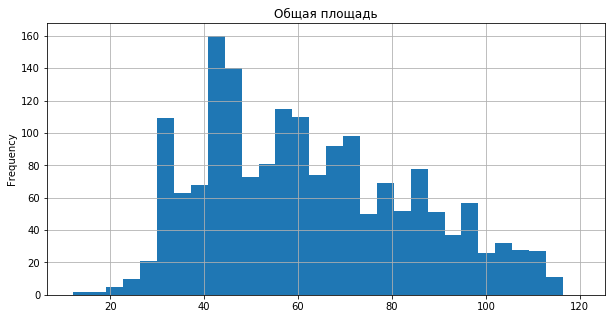

In [65]:
data_center['total_area'].plot(kind = 'hist', bins = 30, range = (12, 120), grid = True, title = 'Общая площадь', figsize = (10, 5))

Пики на диагамме можно интерпретировать как типичную площадь студий, одно-, двух- и трехкомнатных квартир соответственно.
##### Цена

In [66]:
data_center['sq_m_price'].describe()

count     1,741.00
mean    116,239.20
std      23,729.92
min      26,250.00
25%      98,542.00
50%     114,253.00
75%     134,042.00
max     167,187.00
Name: sq_m_price, dtype: float64

Цены за квадратный метр лежат в диапазоне 26250 - 167187 рублей. Большинство из них - в диапазоне 98542 - 134042 (116 тысяч в среднем). Чуть выше, чем средняя цена по всей таблице. Проиллюстрируем это гистограммой:

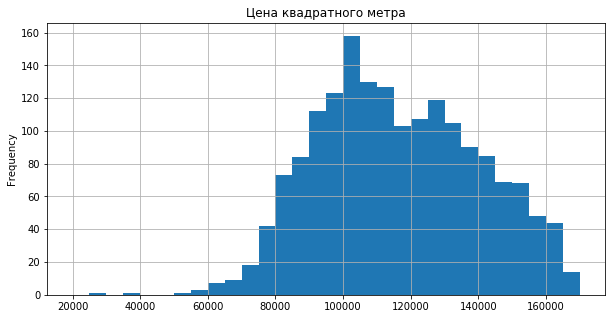

In [67]:

data_center['sq_m_price'].plot(kind = 'hist', bins = 30, grid = True, range = (20000, 170000), title = 'Цена квадратного метра', figsize = (10, 5))

##### Число комнат

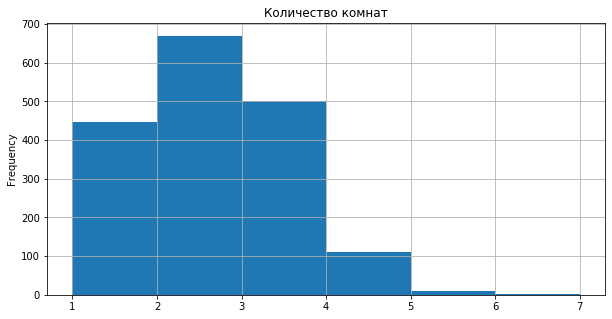

In [68]:
data_center['rooms'].plot(kind = 'hist', bins = 6, grid = True, range = (1, 7), title = 'Количество комнат', figsize = (10, 5))

Большинство квартир в продаже все еще одно-, двух- и трехкомнатные. Однако, теперь большинство за двухкомнатными, в отличие от всей таблицы, где преобладали однокомнатные квартиры.
##### Высота потолков

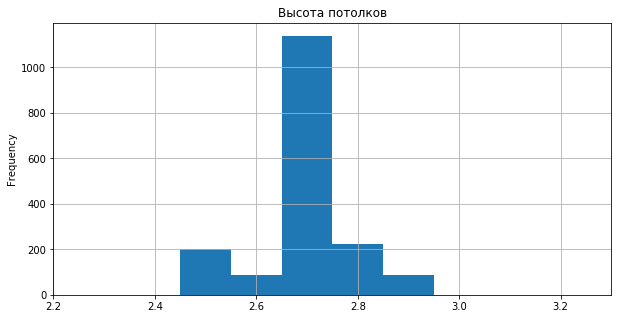

In [69]:
data_center['ceiling_height'].plot(kind = 'hist', bins = 10, grid = True, range = (2.25, 3.25), title = 'Высота потолков', figsize = (10, 5))

Наиболее часто встречаются квартиры с высотой потолков 2.65 - 2.75 метров. Это несколько выше, чем по всей таблице - там разброс был от 2.4 до 2.8 метров.
#### Изучение факторов, влияющих на стоимость квартиры
##### Площадь

Коэффициент корреляции: -0.10959702091200572


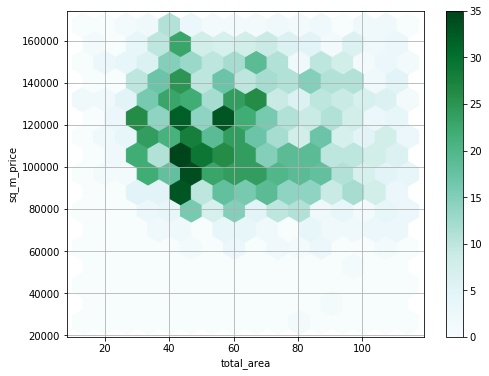

In [70]:
print(f'Коэффициент корреляции: {data_center["total_area"].corr(data["sq_m_price"])}')
data_center.plot(kind='hexbin', x='total_area', y='sq_m_price', gridsize=15, figsize=(8, 6), sharex=False, grid=True)

Имеем очень слабую отрицательную корреляцию. Большинство предложий составляют квартиры площадью около 45 квадратных метров с ценой около 95-110 тысяч рублей - похоже на результат по общей таблице.
##### Число комнат

Коэффициент корреляции: -0.19061742822432873


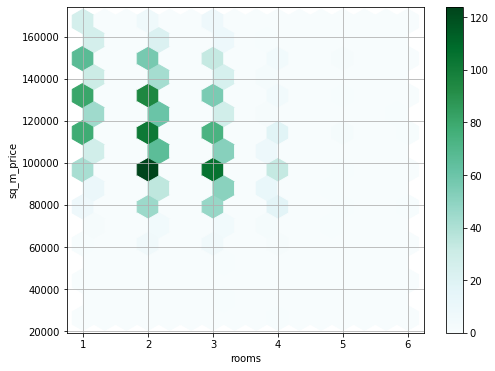

In [71]:
print(f'Коэффициент корреляции: {data["rooms"].corr(data["sq_m_price"])}')
data_center.plot(kind='hexbin', x='rooms', y='sq_m_price', gridsize=15, figsize=(8, 6), sharex=False, grid=True)

Наблюдается аналогичная предыдущему пункту ситуация - потому что число комнат имеет большую корреляцию с общей площадью квартиры. Судя по коэффициенту, здесь даже наблюдается очень слабая обратная зависимость - с увеличением числа комнат падает цена за квадратный метр площади.<br>
Судя по диаграмме, наиболее частая средняя цена за квадратный метр для двух- и трехкомнатных квартир находится на уровне 100 тысяч рублей, только, в отличие от данных по всей таблице, здесь преобладают двух- и трехкомнатные квартиры. Однокомнатные квартиры чуть подорожали - цена за квадратный метр на уровне 120 тысяч рублей.
##### Удаленность от центра

Коэффициент корреляции: -0.023476946947787822


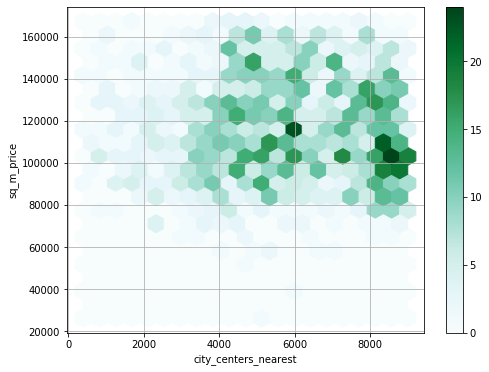

In [72]:
print(f'Коэффициент корреляции: {data_center["city_centers_nearest"].corr(data_center["sq_m_price"])}')
data_center.plot(kind='hexbin', x='city_centers_nearest', y='sq_m_price', gridsize=20, sharex=False, figsize=(8, 6), grid=True)

Отрицательный коэффициент корреляции говорит о том, что с уменьшением расстояния до центра растет стоимость квадратного метра - логически все верно. Корреляция более слабая, чем по всем данным.<br>
Судя по диаграмме, большинсво размещенных квартир расположено на расстоянии около 8 километров от центра со средней ценой около 100 тысяч рублей за квадратный метр.
##### Этаж

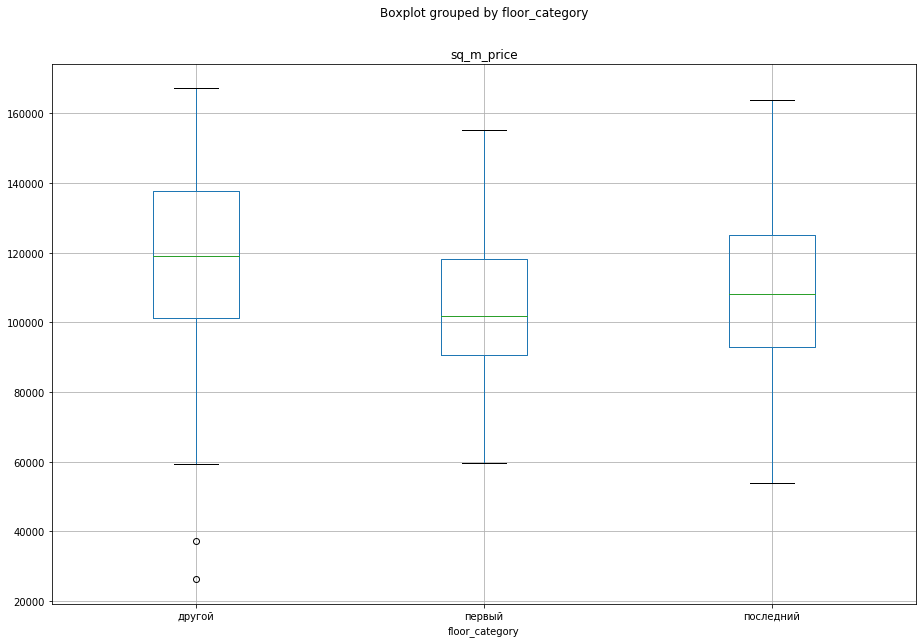

In [73]:
data_center.boxplot(column = 'sq_m_price', by = 'floor_category', figsize = (15,10))

Распределение аналогично таковому по всей таблице, только дороже - первый этаж обойдется дешевле всего (чуть дороже 100 тысяч за метр), последний - около 110 тысяч за метр, а вот этажи между - около 120 тысяч за метр в среднем.
##### Дата размещения
Начнем с иссследования данных по дням недели:

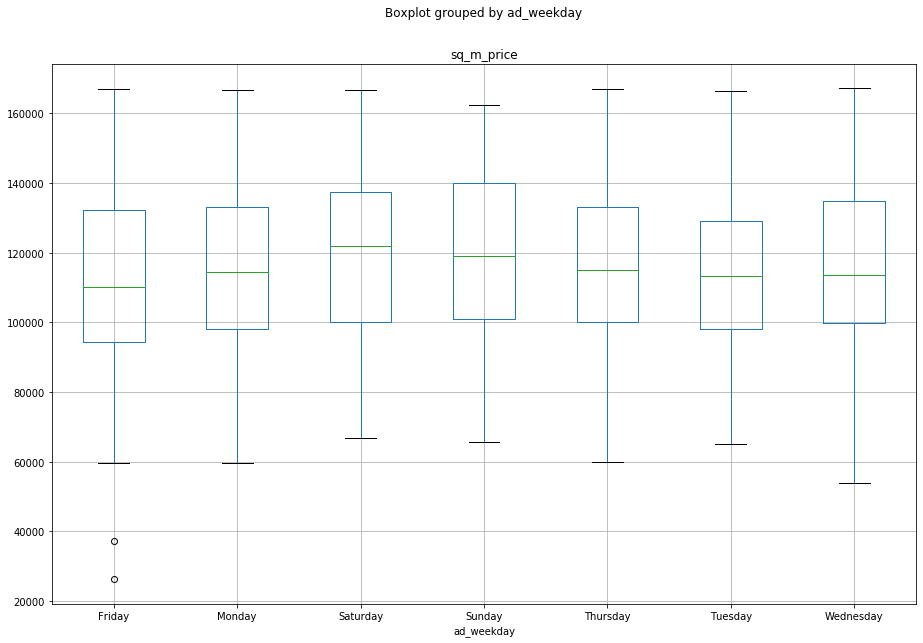

In [74]:
data_center.boxplot(column = 'sq_m_price', by = 'ad_weekday', figsize = (15,10))

Дороже всего продаются квартиры, выставленные на продажу на выходных, дешевле всего - в пятницу. В данных по всей таблице подобной зависимости не было.<br>
Далее рассмотрим месяцы:

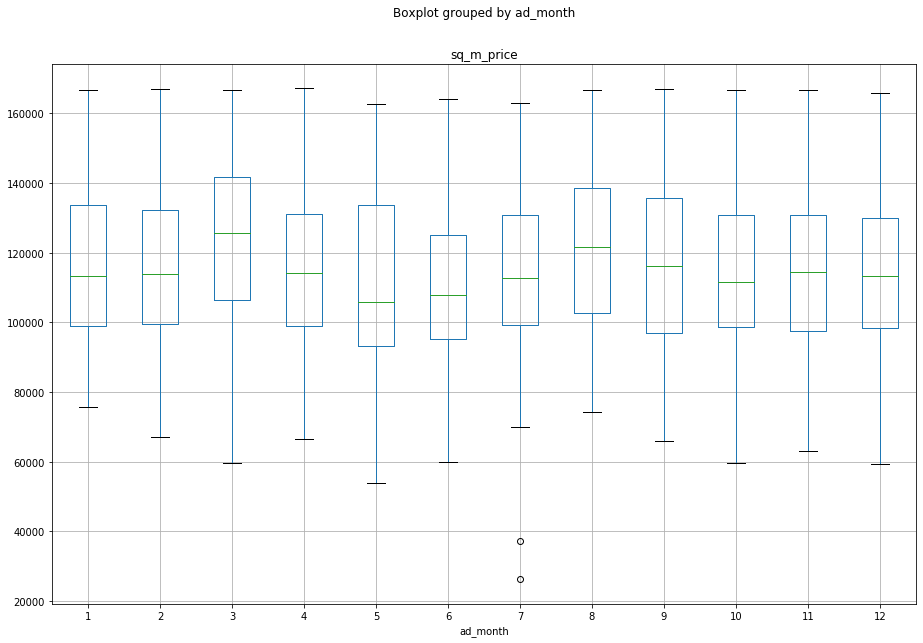

In [75]:
data_center.boxplot(column = 'sq_m_price', by = 'ad_month', figsize = (15,10))

Характер распределения подобен таковому по всем данным, но более ярко выражен. Дороже стоят квартиры, выставленные на продажу в марте и августе, дешевле - в мае, июне, июле. Остальные месяцы находнятся на среднем уровне.

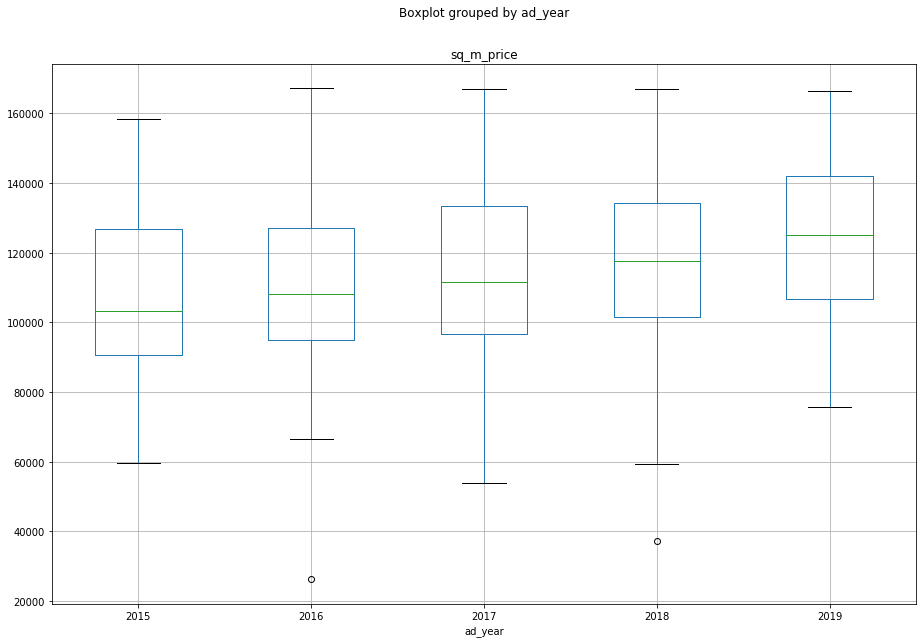

In [76]:
data_center.boxplot(column = 'sq_m_price', by = 'ad_year', figsize = (15,10))

Прослежиивется такой же тренд, как и по всем данным - с каждым годом недвижимость дорожает.<br>
Однако, поскольку это квартиры центральной зоны, то и цены будут выше средних по всем данным - около 105 тысяч в 2015 году и 125 тысяч в 2019.

#### Вывод
В основном все тенденции, найденные для общих данных, справедливы и для центральной зоны. Чаще в продаже в центральной зоне встречаются двухкомнатные квартиры, в то время как для всей таблицы наиболее популярны однокомнатные квартиры. В остальном же - все подобно, только средние цены выше.

## Общий вывод

В ходе работы было проведено исследование рынка недвижимости Санкт-Петербурга и ЛО. <br>
Были изучены такие параметры квартир как площадь, цена, число комнат, высота потолков. <br>
* Средняя цена по всей таблице - около 100 тысяч рублей, в Санкт-Петербурге же около 115 тысяч рублей.
* Чаще продают однокомнатные квартиры, в самом Санкт-Петербурге - двухкомнатные.
* Средняя высота потолков в Санкт-Петербурге выше, чем по всей таблице.

Были выявлены следующие зависимости:
* Площадь и число комнат практически не влияют на цену квадратного метра;
* Квартиры на крайних этажах домов стоят дешевле;
* Чем ближе квартира к центру - тем она дороже;
* Дата размещения (день и месяц) практически не влияют на стоимость недвижимости в ЛО. В Санкт-Петербурге дороже квартиры, выставленные на продажу на выходных, дешевле - в пятницу. По месяцам же дороже стоят квартиры, выставленные на продажу в марте и августе, дешевле - в мае, июне, июле. Общий тренд - недвижимость дорожает с каждым годом.